# TP: Machine Learning (SIA_3611)

## TP3: Clustering (4h)

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP3 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("data/Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Longitude                        1649 non-null   float64
 2   Latitude                         1649 non-null   float64
 3   Continent                        1649 non-null   object 
 4   Year                             1649 non-null   int64  
 5   Status                           1649 non-null   object 
 6   Life_expectancy                  1649 non-null   float64
 7   Adult_mortality                  1649 non-null   float64
 8   Infant_deaths                    1649 non-null   int64  
 9   Alcohol                          1649 non-null   float64
 10  Percentage_expenditure           1649 non-null   float64
 11  Hepatitis_B                      1649 non-null   float64
 12  Measles                  

<ipython-input-43-21e20d0bd3dd>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

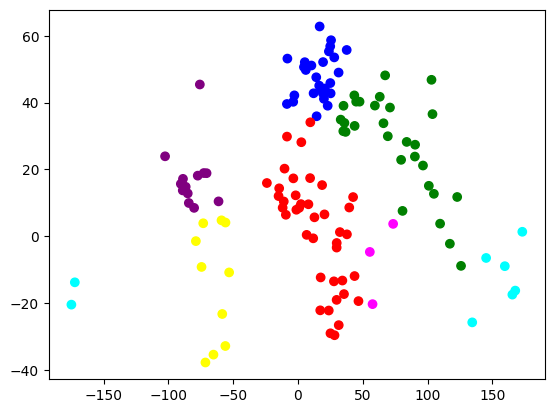

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

In [ ]:
print(df1[['Country']])

          Country
2     Afghanistan
18        Albania
34        Algeria
50         Angola
82      Argentina
...           ...
2812      Uruguay
2828   Uzbekistan
2844      Vanuatu
2908       Zambia
2924     Zimbabwe

[130 rows x 1 columns]


**QUESTION 1**

**Identify each class with the plot colors.**

Each colors represent a continent, blue for europe, yellow for south america, purple for north america, red for africa, green for asia, cyan for oceanie and pink for seven sea.

**What do the coordinates correspond to ?**

The coordinate represent longitude on x axis (-180:180) and latitude on y axis (-90:90) with one point per country. So the plot is a representation of  the planisfere.

**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

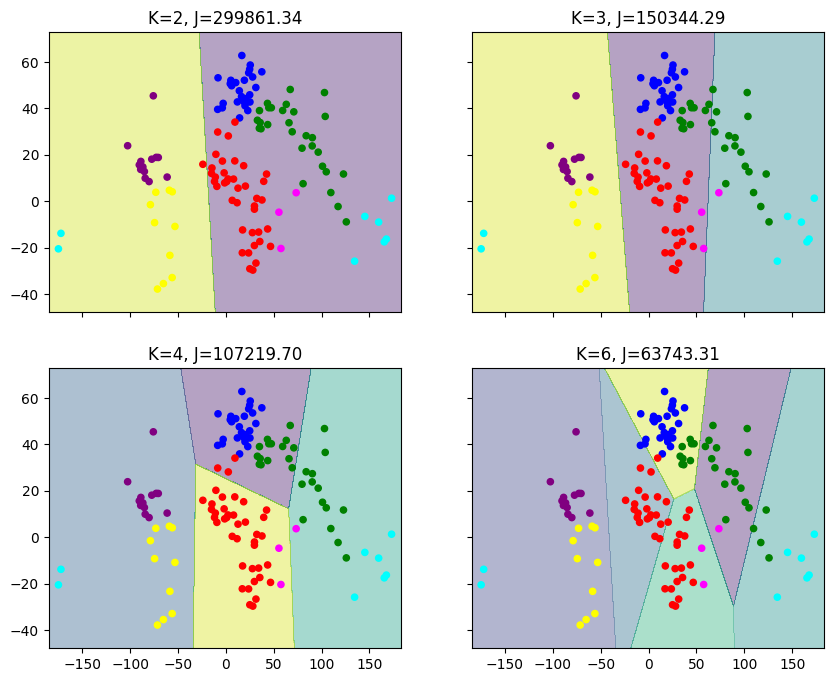

In [ ]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_,
                         "K=4, J=%.2f" % km4.inertia_,
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 2**

**How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?**

The inertia corresponds to the sum of the squared distances between each point and the centre of the cluster with which that point is associated. Inertia is not optimal because it does not take into account the shape or density of clusters. Nor does it take account of actual geographical distance. For a spatial dataset, it is better to use the **Silhouette Score** metric as it measures both cohesion and separation between the different clusters, slide 63.

**Which is the main problem with the mercator representation for continent detection?**

Mercator projection is a cylindrical cartographic representation. This type of projection distorts distances as you move away from the equator. The closer you get to the poles, the larger the distances and regions appear, and conversely, the closer you get to the equator, the smaller they appear.



## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

<ipython-input-46-60287a8f09f8>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

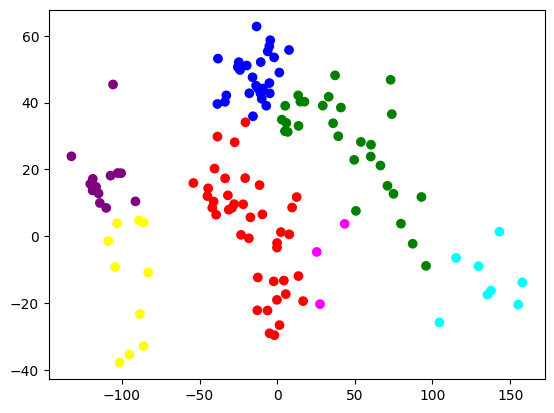

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1_normalized = df_X.to_numpy()
np1_normalized[:,0] = np1_normalized[:,0] - 30

for i in range(len(np1)):
  if np1_normalized[i,0] < -180:
    np1_normalized[i,0] = np1_normalized[i,0] + 360

# To displace the origin of longitude of 30° east : np1[:,0]-30
plt.scatter(np1_normalized[:,0], np1_normalized[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt

**QUESTION 3**

**What are the advantages of this normalization?**

Thanks to this normalization we have a better spatial repartition because our dataset is centered. The main part of the data is on the origins. That helps to reduce bias induced by disproportionte gaps. Moreover, Oceania was separated in two part so we had 360° to the left part of Oceania to regroup Oceania in one continent like in real life. In fact, this separation will be problematic when we will applied a KMeans algorithm.

In [ ]:
print(np1_normalized)

[[ 3.60047337e+01  3.38352307e+01]
 [-9.95016604e+00  4.11424499e+01]
 [-2.73826770e+01  2.81589385e+01]
 [-1.24626323e+01 -1.22933605e+01]
 [-9.51798069e+01 -3.53813488e+01]
 [ 1.49299328e+01  4.02895257e+01]
 [ 1.04491000e+02 -2.57328870e+01]
 [-1.58735239e+01  4.75854944e+01]
 [ 1.75459988e+01  4.02882723e+01]
 [ 6.02381274e+01  2.38673116e+01]
 [-1.96790693e+00  5.35313138e+01]
 [-2.53593489e+01  5.06398158e+01]
 [-1.18710105e+02  1.72002751e+01]
 [-2.76721475e+01  9.64175970e+00]
 [ 6.04018815e+01  2.74110659e+01]
 [-1.22312327e+01  4.41745012e+01]
 [-6.20146632e+00 -2.21840321e+01]
 [-8.30978311e+01 -1.07877770e+01]
 [-4.78447091e+00  4.27689032e+01]
 [-3.17545660e+01  1.22695385e+01]
 [-1.24878440e-01 -3.35939666e+00]
 [-5.39598882e+01  1.59552332e+01]
 [ 7.49069433e+01  1.27200479e+01]
 [-1.72603584e+01  5.69109849e+00]
 [-1.05697000e+02  4.54247240e+01]
 [-9.53173169e+00  6.56823297e+00]
 [-1.13550749e+01  1.53333376e+01]
 [-1.01382562e+02 -3.77307099e+01]
 [ 7.38190735e+01  3

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

In [ ]:
# Importing libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(np1_normalized)

labels = kmeans.labels_

df_X['Cluster'] = labels

<ipython-input-49-a931a61ef526>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



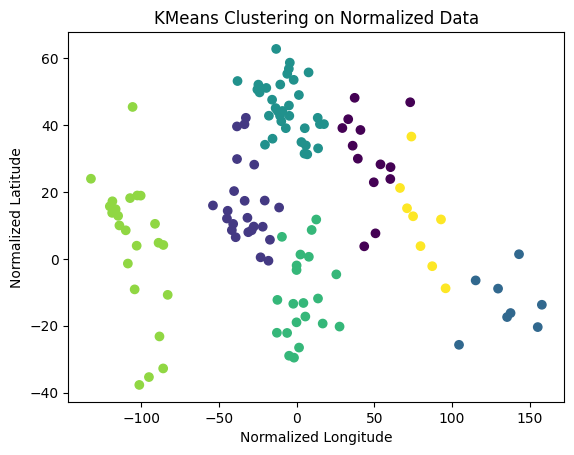

In [ ]:
plt.scatter(np1_normalized[:, 0], np1_normalized[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clustering on Normalized Data")
plt.xlabel("Normalized Longitude")
plt.ylabel("Normalized Latitude")
plt.show()

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
def GMM_function(components, df_X_normalized, covariance_type='full', init_params='kmeans', ax=None):
    gmm = GaussianMixture(n_components=components, covariance_type=covariance_type, init_params=init_params)
    gmm.fit(df_X_normalized)
    labels = gmm.predict(df_X_normalized)
    ax.scatter(df_X_normalized[:, 0], df_X_normalized[:, 1], c=labels, cmap='viridis')
    ax.set_title(f"GMM with {components} components")
    ax.set_xlabel("Normalized Longitude")
    ax.set_ylabel("Normalized Latitude")
    return labels

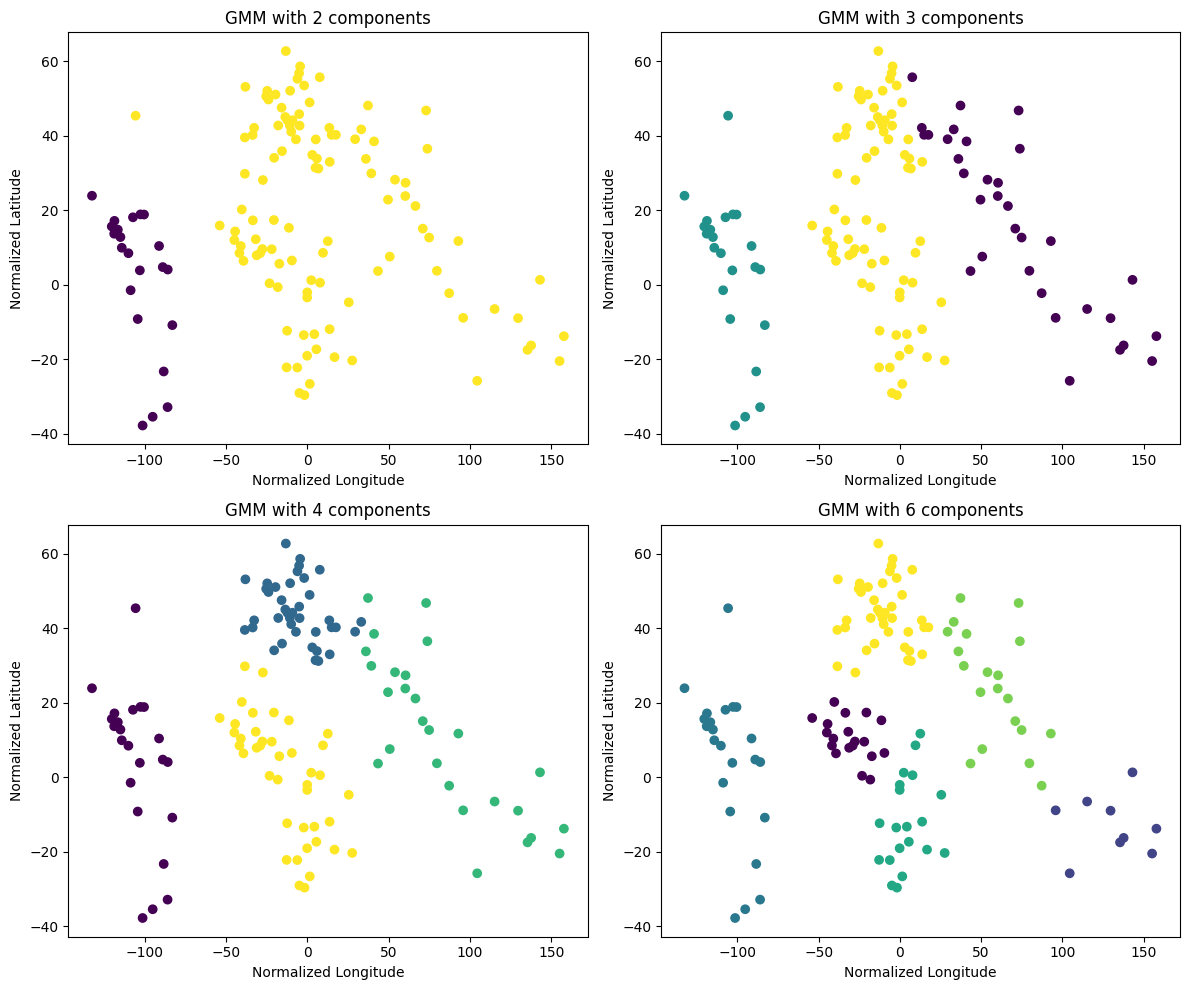

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 10))
for n_components, ax in zip([2, 3, 4, 6], axarr.ravel()):
    GMM_function(n_components, np1_normalized, ax=ax)
plt.tight_layout()
plt.show()

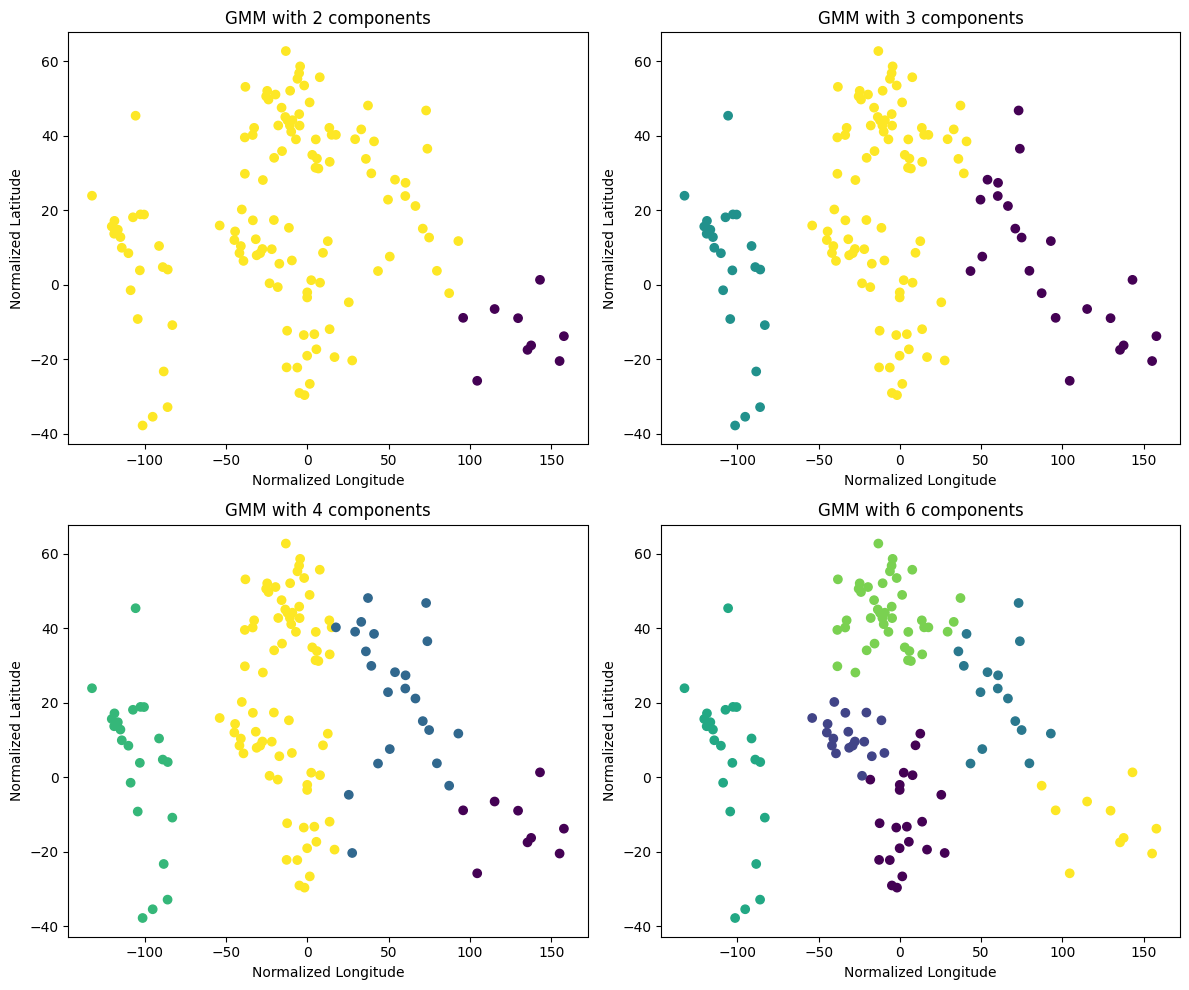

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 10))
for n_components, ax in zip([2, 3, 4, 6], axarr.ravel()):
    GMM_function(n_components, np1_normalized, 'diag', ax=ax)
plt.tight_layout()
plt.show()

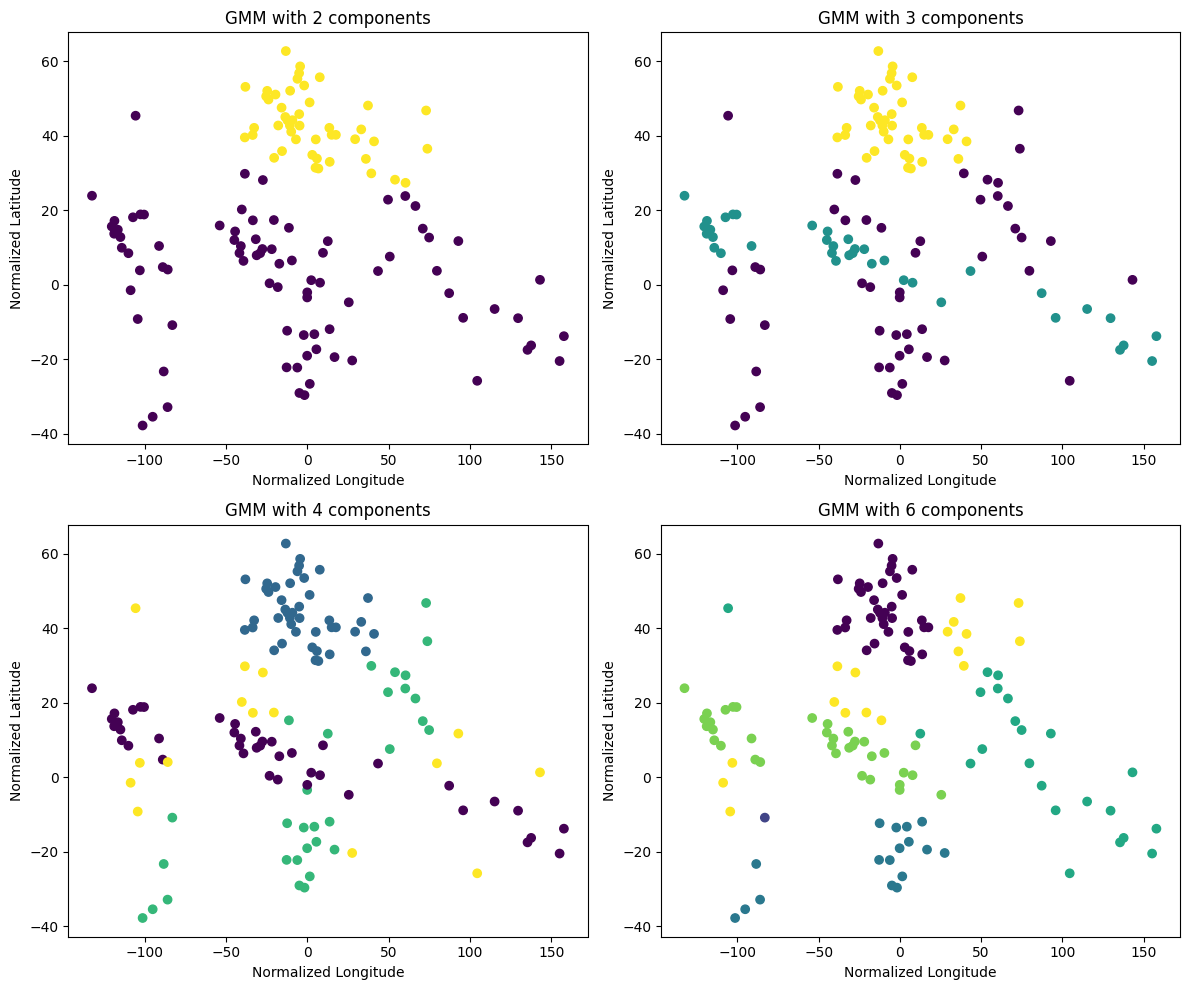

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 10))
for n_components, ax in zip([2, 3, 4, 6], axarr.ravel()):
    GMM_function(n_components, np1_normalized, init_params='random', ax=ax)
plt.tight_layout()
plt.show()

**QUESTION 4**

**Which is the best method to detect continents?**

The best method is GMM because it allows to have clusters in several form and size thanks to a probabilistic approach. unlike K-Means which allows spheric clusters and each clusters have the same size. GMM is therefore better suited to our study, since the continents are neither the same size nor the same shape, let alone the shape of a circle.

**For this method, what would be the probability to find a country in the coordinates [-50, -40]?**

In order to know the probability of finding a country at coordinates [-50, -40] with the GMM, we need to to use the fitted GMM model to estimate this probability. The GMM can generate a probability for any point by calculating the probability density at that position in space. It would be sufficient to use the GMM's score_samples method to estimate this density at coordinates [-50, -40].

**What methodology can you think of to detect unpopulated oceans?**

We need to identify regions where the probability density calculated by the GMM is very low. This would indicate that these regions are far from country clusters, suggesting a low presence of inhabited territories or countries in these areas.

In [ ]:
coordinates = np.array([[-50, -40]])

gmm = GaussianMixture(n_components=7, covariance_type="diag")
gmm.fit(np1_normalized)

log_prob = gmm.score_samples(coordinates)
probability = np.exp(log_prob)

print(f"The density of probability at [-50, -40] is : {probability}")


The density of probability at [-50, -40] is : [1.32510116e-09]


We have 3.55403151e-10 of density of probability that's means it is very unlikely to find a country at these coordinates. This very low value indicates that this region is probably located in an ocean or far from the centres of density of the countries.

Based on this result, we can determine the position of the unpopulated oceans. We need to choose a probability threshold, for example 10-6, and all the coordinates with this probability or even lower are sparsely populated or unpopulated regions.

**BONUS**

**Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.**

**Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.**

In [ ]:
import plotly.express as px

def lat_lon_to_cartesian(lat, lon):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    return np.array([x, y, z])

cartesian_coords = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in zip(df1['Latitude'], df1['Longitude'])])
kmeans = cluster.KMeans(n_clusters=7, n_init=10).fit(cartesian_coords)

df1['KMeans_Cosine_Cluster'] = kmeans.labels_

fig1 = px.scatter_3d(df1, x=cartesian_coords[:, 0], y=cartesian_coords[:, 1], z=cartesian_coords[:, 2], color='KMeans_Cosine_Cluster')
fig1.show()


<ipython-input-57-2566add7730c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



By using the unit sphere and cosine similarity, clustering takes into account the Earth's curvature, which makes the results more suitable for geographic data, and cluster boundaries are determined as a function of the angle between the coordinate vectors, which is better for geodetic distance.

## STEP 3: Detection of caribbean island

**TO CODE 3.1**

Isolate the North and South American continents.

<ipython-input-58-3c4a803b02df>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-58-3c4a803b02df>:5: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

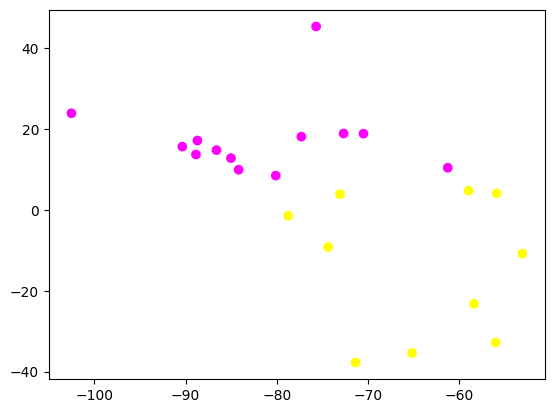

In [ ]:
df2 = df1[(df.Continent == "North America") | (df.Continent == "South America")]
df_X = df2[['Longitude', 'Latitude']]
df_America = df_Status[(df1.Continent == "North America") | (df1.Continent == "South America")]

df_Y_America = df_America.replace(['North America', 'South America'], [0, 1])
np_Y_America = df_Y_America.to_numpy()
np_Y_America = np_Y_America.reshape((np_Y_America.shape[0],))

np1_America = df_X.to_numpy()
plt.scatter(np1_America[:,0], np1_America[:,1], c=np_Y_America, cmap=matplotlib.colors.ListedColormap(['magenta','yellow']))
plt

**TO CODE 3.2**

**Propose a methodology to create a cluster including caribbean independent nations.**

After analysing the distribution of points, one idea seems obvious: to reduce the dimension of the equation y = x. North America is in the north and South America in the south. The Caribbean islands are in the middle. They are in the centre on the right. So we're going to do a dimension reduction.



<ipython-input-59-44378cdcf1c6>:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



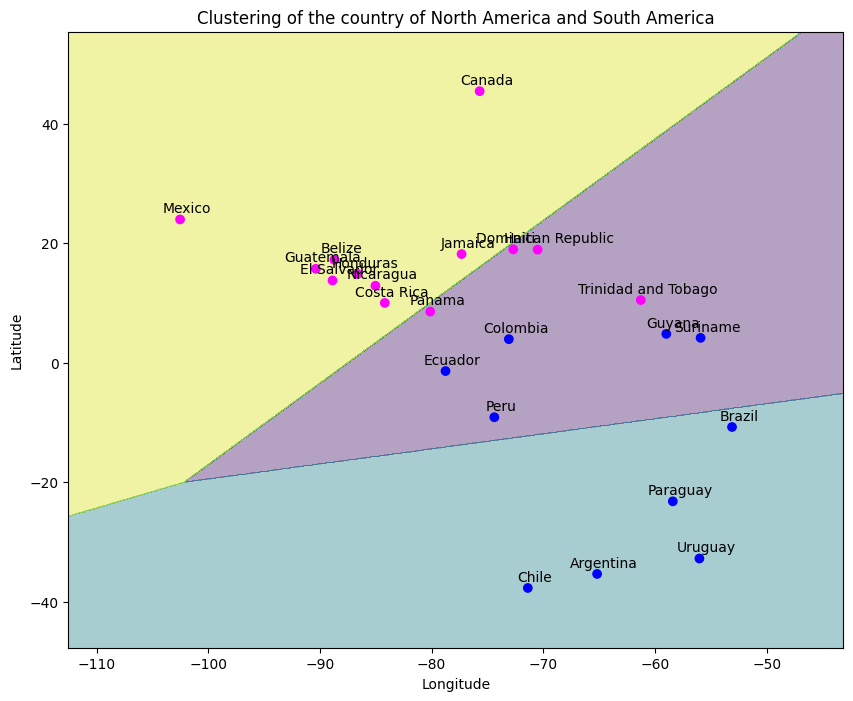

In [ ]:
# We keep only North America Data and South America Data
df2 = df1[(df1['Continent'] == "North America") | (df1['Continent'] == "South America")]
df_X = df2[['Longitude', 'Latitude']]
df_L = df2[['Country']]

# We create a new column to classify continent : North America (0) et South America (1)
df_America = df_Status[(df1['Continent'] == "North America") | (df1['Continent'] == "South America")]
df_Y_America = df_America.replace(['North America', 'South America'], [0, 1])
np_Y_America = df_Y_America.to_numpy().reshape((-1,))

np1_America = df_X.to_numpy()
np1_America_labels = df_L.to_numpy()

kmeans_america = cluster.KMeans(n_clusters=3).fit(np1_America)

x_min, x_max = np1_America[:, 0].min() - 10, np1_America[:, 0].max() + 10
y_min, y_max = np1_America[:, 1].min() - 10, np1_America[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, figsize=(10, 8))

# Label preidction
Z = kmeans_america.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(np1_America[:, 0], np1_America[:, 1], c=np_Y_America, cmap=matplotlib.colors.ListedColormap(['magenta', 'blue']))

for i, label in enumerate(np1_America_labels):
    plt.annotate(label[0], (np1_America[i, 0], np1_America[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.title('Clustering of the country of North America and South America')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The choice of three clusters seems to capture these large geographical regions approximately well. However, clustering does make some mistakes. The only country well captured is Trinidad and Tabago. Some countries are wrongly selected in the Caribbean, such as Guyana, Suriname and others. And some Caribbean countries are captured in North America, such as Jamaica.

**QUESTION 5**

**Which is the outlier of this clustering problem?**

The outlier identified in this clustering problem is Canada. This can be explained by the fact that Canada is geographically very large and its mean coordinates may be far from the other countries in the cluster to which it belongs, making it an anomaly in the clustering context. Because of Canada, the centroid is displaced and separation is therefore poor.

We will to delete the Canada from de DATA to see if the clustering is better.

<ipython-input-60-ecab8406d465>:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



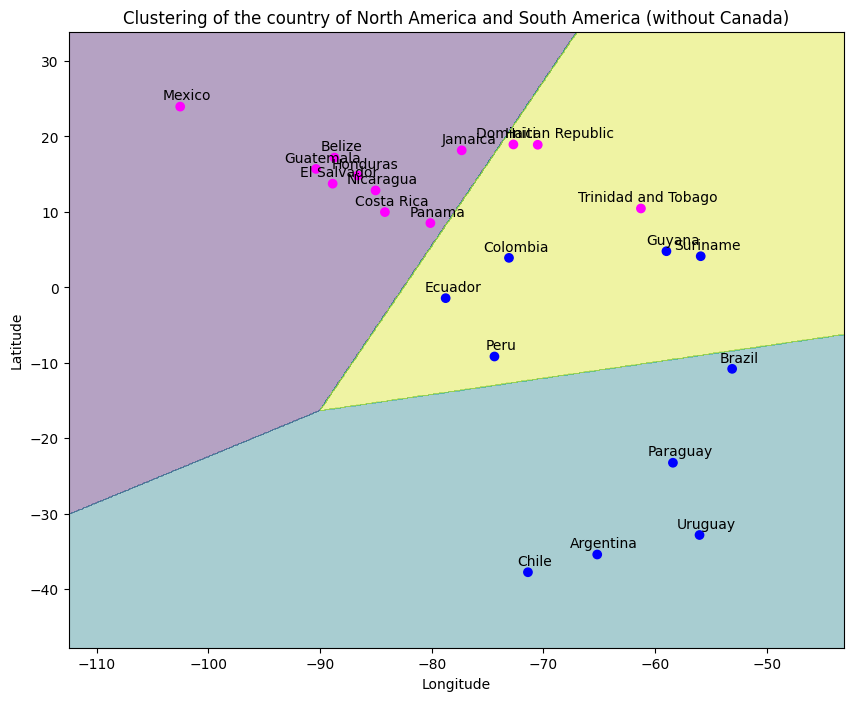

In [ ]:
# We keep only North America Data and South America Data
df2 = df1[(df1['Continent'] == "North America") | (df1['Continent'] == "South America")]
df2 = df2[df2['Country'] != 'Canada']  # Retirer le Canada
df_X = df2[['Longitude', 'Latitude']]
df_L = df2[['Country']]

# We create a new column to classify continent : North America (0) et South America (1)
df_America = df2[['Continent']]  # Mise à jour pour correspondre à df2 déjà filtré
df_Y_America = df_America.replace(['North America', 'South America'], [0, 1])
np_Y_America = df_Y_America.to_numpy().reshape((-1,))

np1_America = df_X.to_numpy()
np1_America_labels = df_L.to_numpy()

kmeans_america = cluster.KMeans(n_clusters=3).fit(np1_America)

x_min, x_max = np1_America[:, 0].min() - 10, np1_America[:, 0].max() + 10
y_min, y_max = np1_America[:, 1].min() - 10, np1_America[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 1, figsize=(10, 8))

# Label prediction
Z = kmeans_america.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr.contourf(xx, yy, Z, alpha=0.4)

plt.scatter(np1_America[:, 0], np1_America[:, 1], c=np_Y_America, cmap=matplotlib.colors.ListedColormap(['magenta', 'blue']))

for i, label in enumerate(np1_America_labels):
    plt.annotate(label[0], (np1_America[i, 0], np1_America[i, 1]), textcoords="offset points", xytext=(5, 5), ha='center')

plt.title('Clustering of the country of North America and South America (without Canada)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


It would seem that the problem is not only due to an outlier but surely to the distribution of countries. Central America and the Caribbean have highly concentrated countries, whereas the opposite is true for North and South America.

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

<ipython-input-61-bcc2b6f57f0b>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



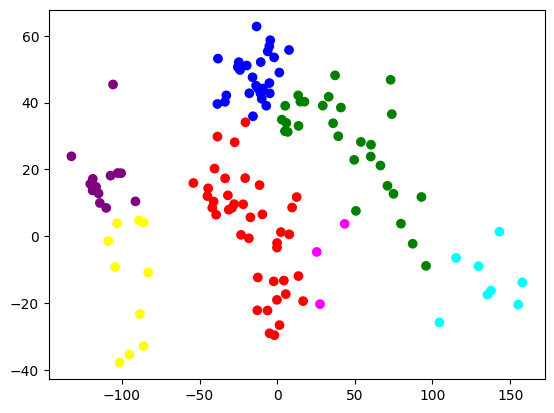

In [ ]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1d = df_X.to_numpy()
np1[:,0] = np1[:,0] - 30

for i in range(len(np1)):
  if np1[i,0] < -180:
    np1[i,0] = np1[i,0] + 360

plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()

In [ ]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


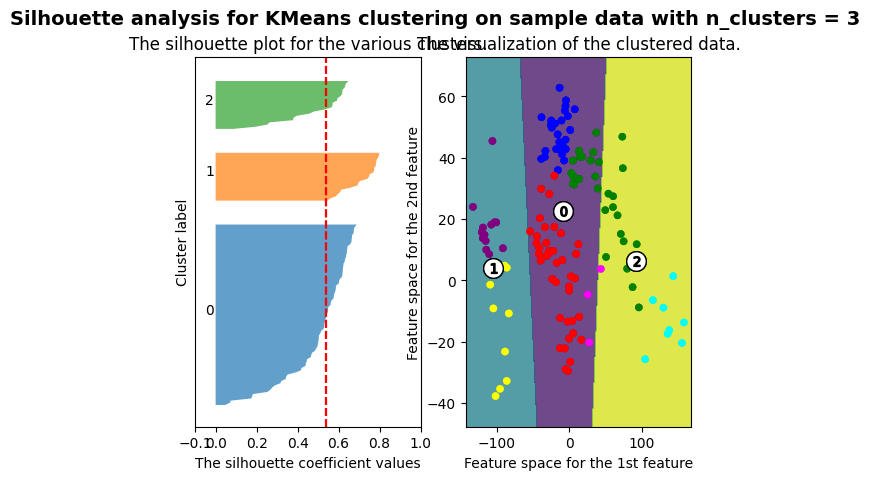

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    centers = km.cluster_centers_

    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

In [ ]:
def apply_Kmeans(K, np1):


  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(np1) + (K + 1) * 10])

  km = cluster.KMeans(n_clusters=K, random_state=10)
  cluster_labels = km.fit_predict(np1)

  silhouette_avg = silhouette_score(np1, cluster_labels)
  print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
  sample_silhouette_values = silhouette_samples(np1, cluster_labels)

  y_lower = 10
  for i in range(K):
      ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      ax1.fill_betweenx(
          np.arange(y_lower, y_upper),
          0,
          ith_cluster_silhouette_values,
          alpha=0.7,
      )

      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      y_lower = y_upper + 10

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)

      ax2.contourf(xx, yy, Z, alpha=0.4)
      ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

      centers = km.cluster_centers_

      ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
      )

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % K,
          fontsize=14,
          fontweight="bold",
      )

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4500091692627439


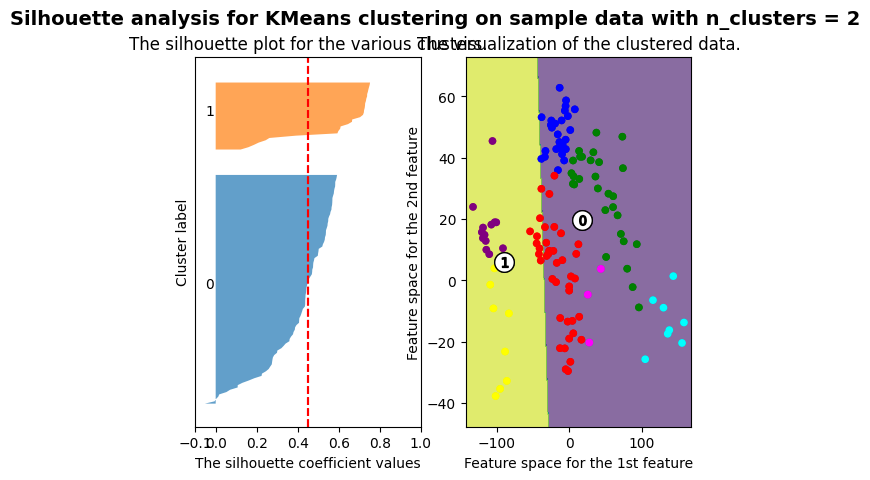

For n_clusters = 3 The average silhouette_score is : 0.5399410318541973


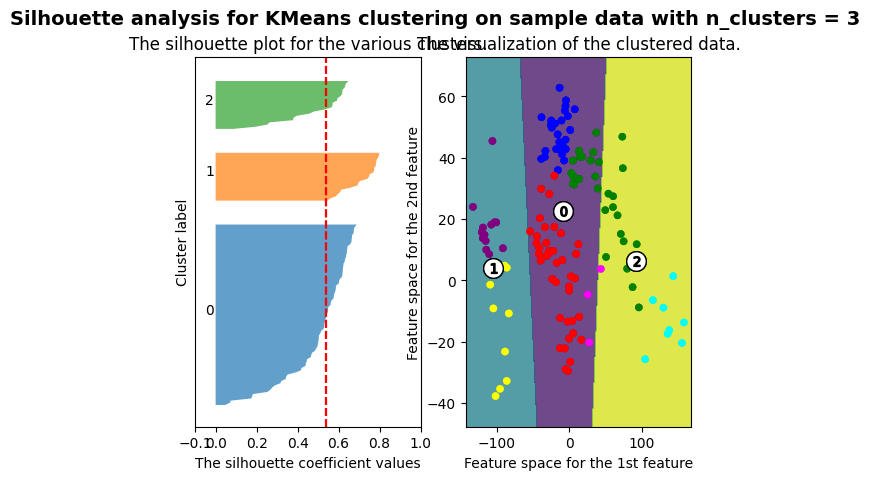

For n_clusters = 4 The average silhouette_score is : 0.4875009627702223


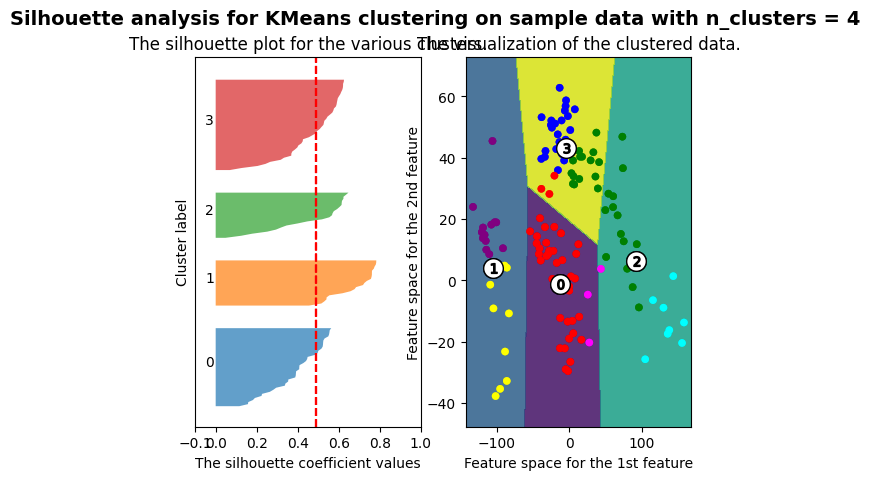

For n_clusters = 6 The average silhouette_score is : 0.5172067215678542


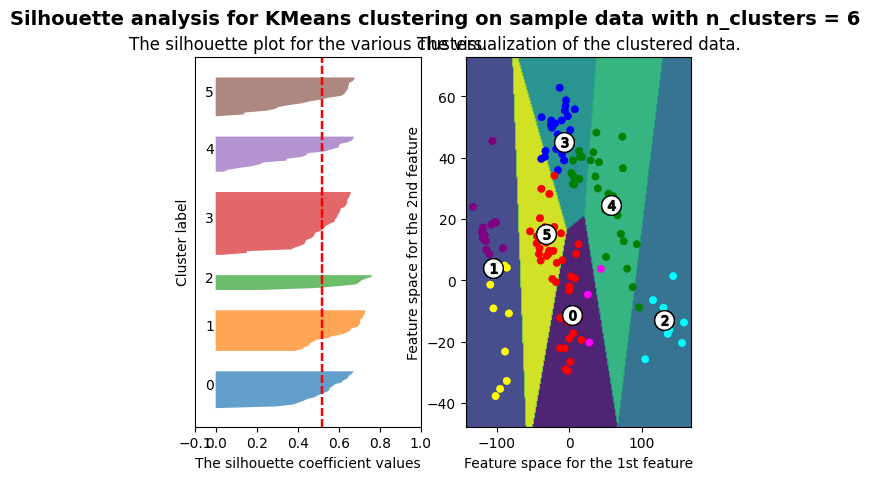

In [ ]:
apply_Kmeans(2, np1)
apply_Kmeans(3, np1)
apply_Kmeans(4, np1)
apply_Kmeans(6, np1)

**Question 6**

**According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.**

For K=2, the silhouette score is high because the division into two groups simplifies distinctions. Butt the clusters are too large to capture the true structure of the data.
According to the silhouette score the most relevant value of K is K=3 and the clusthers are better separated than K=2. For K=3, the majority of points have positive silhouette scores which means that most points are well assigned to their cluster. For K=4, the score decreases and four clusters are formed, but there is an increase in the negative values of the silhouette, which means that some points are incorrectly assigned to their clusters. The result is too much complexity. For K=6, The silhouette even score decrease and the clusters are too close so that is a risk of overlap.
**The best solution is therefore K=3**.

**BONUS**

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

In [ ]:
def compute_gmm_silhouette_scores(np1, component_range, covariance_types):
    results = []

    for n_components in component_range:
        for covariance_type in covariance_types:
            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=10)
            cluster_labels = gmm.fit_predict(np1)

            silhouette_avg = silhouette_score(np1, cluster_labels)
            results.append((n_components, covariance_type, silhouette_avg))
            print(f"For n_components = {n_components}, covariance_type = {covariance_type}, the average silhouette_score is: {silhouette_avg}")

    return results

component_range = [2, 3, 4, 6]
covariance_types = ['full', 'tied', 'diag', 'spherical']

silhouette_scores = compute_gmm_silhouette_scores(np1, component_range, covariance_types)

silhouette_scores


For n_components = 2, covariance_type = full, the average silhouette_score is: 0.49236705877955916
For n_components = 2, covariance_type = tied, the average silhouette_score is: 0.3192894162618376
For n_components = 2, covariance_type = diag, the average silhouette_score is: 0.504944875695098
For n_components = 2, covariance_type = spherical, the average silhouette_score is: 0.504944875695098
For n_components = 3, covariance_type = full, the average silhouette_score is: 0.48982154034097675
For n_components = 3, covariance_type = tied, the average silhouette_score is: 0.5374684770112103
For n_components = 3, covariance_type = diag, the average silhouette_score is: 0.5399410318541973
For n_components = 3, covariance_type = spherical, the average silhouette_score is: 0.5366450764787363
For n_components = 4, covariance_type = full, the average silhouette_score is: 0.47718474824243085
For n_components = 4, covariance_type = tied, the average silhouette_score is: 0.4635801797649813
For n_com

[(2, 'full', 0.49236705877955916),
 (2, 'tied', 0.3192894162618376),
 (2, 'diag', 0.504944875695098),
 (2, 'spherical', 0.504944875695098),
 (3, 'full', 0.48982154034097675),
 (3, 'tied', 0.5374684770112103),
 (3, 'diag', 0.5399410318541973),
 (3, 'spherical', 0.5366450764787363),
 (4, 'full', 0.47718474824243085),
 (4, 'tied', 0.4635801797649813),
 (4, 'diag', 0.4839441834952722),
 (4, 'spherical', 0.33176192029155527),
 (6, 'full', 0.5126266876282108),
 (6, 'tied', 0.511371497083284),
 (6, 'diag', 0.4850771311934033),
 (6, 'spherical', 0.5097640150902664)]

Results analyse : The best results are for a number of 3 components with diag in covariance, the silhouette score of 0.54. This indicates that three clusters are sufficient to captur the structure of the data while maintaining good separation.

These new observations confirm the choice we made earlier with K=3.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

In [ ]:
from sklearn.metrics import homogeneity_score
for k in [2,3,4,6]:
  km = cluster.KMeans(n_clusters=k).fit(np1)
  cluster_labels = km.fit_predict(np1)
  h = homogeneity_score(np_Y, cluster_labels)
  print(f"For K = {k}, the homogeneity score score is: {h}")


For K = 2, the homogeneity score score is: 0.23248448940225225
For K = 3, the homogeneity score score is: 0.4245233692113754
For K = 4, the homogeneity score score is: 0.6375598863778785
For K = 6, the homogeneity score score is: 0.7057277545554422


**Question 7**

**According to the homogeneity score, which is the most relevant value of K ?**

Increasing the number of K clusters improves homogeneity, as can be seen from the scores. This suggests that the data may require a higher number of clusters to capture the underlying structure of the points. It is not necessary to choose too high a K to avoid over-dividing the data, which could make the interpretation of the clusters less relevant. K=6 offers the highest homogeneity score, but should be balanced with other criteria such as the silhouette score. If K continue to increase there is a risk of over-segmentation.

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

In [ ]:
def compute_gmm_homogeneity_scores(np1, np_Y, component_range, covariance_types):
    results = []

    for n_components in component_range:
        for covariance_type in covariance_types:

            gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=10)
            cluster_labels = gmm.fit_predict(np1)

            h_score = homogeneity_score(np_Y, cluster_labels)
            results.append((n_components, covariance_type, h_score))
            print(f"For n_components = {n_components}, covariance_type = {covariance_type}, the homogeneity score is: {h_score}")

    return results

component_range = [2, 3, 4, 6]
covariance_types = ['full', 'tied', 'diag', 'spherical']

homogeneity_scores = compute_gmm_homogeneity_scores(np1, np_Y, component_range, covariance_types)

homogeneity_scores


For n_components = 2, covariance_type = full, the homogeneity score is: 0.25004507379922825
For n_components = 2, covariance_type = tied, the homogeneity score is: 0.30994294849929793
For n_components = 2, covariance_type = diag, the homogeneity score is: 0.2729415759231309
For n_components = 2, covariance_type = spherical, the homogeneity score is: 0.2729415759231309
For n_components = 3, covariance_type = full, the homogeneity score is: 0.475996785357279
For n_components = 3, covariance_type = tied, the homogeneity score is: 0.4163438161639531
For n_components = 3, covariance_type = diag, the homogeneity score is: 0.4245233692113754
For n_components = 3, covariance_type = spherical, the homogeneity score is: 0.4114793292561204
For n_components = 4, covariance_type = full, the homogeneity score is: 0.6779912043645243
For n_components = 4, covariance_type = tied, the homogeneity score is: 0.6420543351913736
For n_components = 4, covariance_type = diag, the homogeneity score is: 0.65307

[(2, 'full', 0.25004507379922825),
 (2, 'tied', 0.30994294849929793),
 (2, 'diag', 0.2729415759231309),
 (2, 'spherical', 0.2729415759231309),
 (3, 'full', 0.475996785357279),
 (3, 'tied', 0.4163438161639531),
 (3, 'diag', 0.4245233692113754),
 (3, 'spherical', 0.4114793292561204),
 (4, 'full', 0.6779912043645243),
 (4, 'tied', 0.6420543351913736),
 (4, 'diag', 0.6530795985400278),
 (4, 'spherical', 0.5794617151221371),
 (6, 'full', 0.7292733785005333),
 (6, 'tied', 0.7250804810551937),
 (6, 'diag', 0.7027550306031013),
 (6, 'spherical', 0.7407036115915009)]

The homogeneity score increases with the number of clusters and reaches its maximum at 6 components and with spherical covariance. A high number of clusters should therefore be used, but once again it is best to make a decision based on several metrics and not just one, as we found above that the best is for K=3.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.


**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

In [ ]:
df_2000 = df[df['Year'] == 2000]

# Countries with more than 12 litres of consumption
alcohol_consumption = 12
high_alcohol_countries = df_2000[df_2000['Alcohol'] > alcohol_consumption]

print("Countries with high alcohol consumption in 2000:")
print(high_alcohol_countries['Country'].unique())

Countries with high alcohol consumption in 2000:
['Austria' 'Belarus' 'France' 'Germany' 'Luxembourg']


**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

Explaination of the parameters choice :

"The Global Burden of Disease Study 2016" published in The Lancet. This article describes the risk factors associated with alcohol consumption and their impact on health and the economy. It deals with parameters such as life expectancy, alcohol-related diseases and variations in GDP (PIB).

In [ ]:
print(df.columns)

Index(['Country', 'Longitude', 'Latitude', 'Continent', 'Year', 'Status',
       'Life_expectancy', 'Adult_mortality', 'Infant_deaths', 'Alcohol',
       'Percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'Under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Thinness _1-19_years',
       'Thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


Correlation matrix for alcohol and other parameters:
                  Alcohol  Life_expectancy  Adult_mortality       GDP
Alcohol          1.000000         0.407042        -0.229507  0.575702
Life_expectancy  0.407042         1.000000        -0.888617  0.342017
Adult_mortality -0.229507        -0.888617         1.000000 -0.230658
GDP              0.575702         0.342017        -0.230658  1.000000


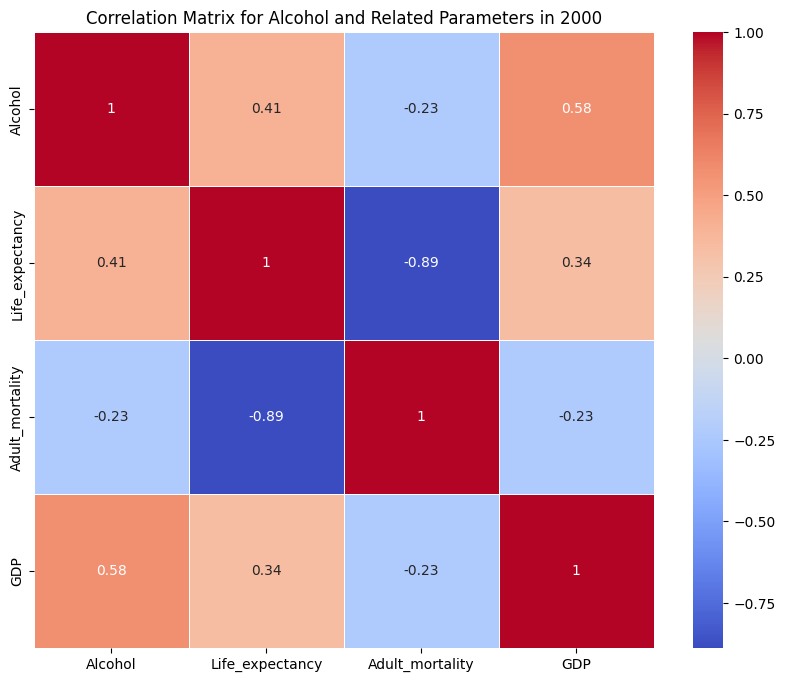

In [ ]:
relevant_columns = ['Alcohol', 'Life_expectancy', 'Adult_mortality', 'GDP']
df_parameters = df_2000[relevant_columns]

correlations = df_parameters.corr()
print("Correlation matrix for alcohol and other parameters:")
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Alcohol and Related Parameters in 2000')
plt.show()

Correlation between all parameters its coherent except for Alcohol and Adult Mortality. In fact, this compute of correlation seems that more an adult drinks, the less likely they are to die early.